In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib as mlt
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [ ]:
nq = pd.read_csv('/content/normalnqtrain.csv')
nq.head()

,expinf,highyield,m2,rgdp,house,10tminust2,unemp,nq100
0,1.053159,-0.713687,-1.398564,-1.163399,0.096543,-1.423320,-0.727017,-0.886059
1,1.322769,-0.786861,-1.389905,-1.163399,0.096543,-1.559525,-0.681875,-0.901035
2,1.338750,-0.815774,-1.385125,-1.163399,0.096543,-1.457947,-0.727017,-0.888702
3,1.473701,-0.882187,-1.374931,-1.163399,0.096543,-1.331267,-0.727017,-0.889801
4,1.675933,-0.896703,-1.370922,-1.163399,0.096543,-1.285581,-0.772159,-0.934947


In [ ]:
독립 = nq[['expinf','highyield','m2','rgdp','house','10tminust2','unemp']]
종속 = nq[['nq100']]

In [ ]:
X = tf.keras.layers.Input(shape=[7])

H = tf.keras.layers.Dense(6)(X)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dense(6)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

H = tf.keras.layers.Dense(6)(H)
H = tf.keras.layers.BatchNormalization()(H)
H = tf.keras.layers.Activation('swish')(H)

Y = tf.keras.layers.Dense(1)(H)
model = tf.keras.models.Model(X, Y)
model.compile(loss='mse')

In [ ]:
model.fit(독립, 종속, epochs=100)

Epoch 1/100
6/6 [==============================] - 1s 5ms/step - loss: 1.6715
Epoch 2/100
6/6 [==============================] - 0s 5ms/step - loss: 0.8037
Epoch 3/100
6/6 [==============================] - 0s 5ms/step - loss: 1.0284
Epoch 4/100
6/6 [==============================] - 0s 5ms/step - loss: 0.7973
Epoch 5/100
6/6 [==============================] - 0s 5ms/step - loss: 0.6786
Epoch 6/100
6/6 [==============================] - 0s 4ms/step - loss: 0.5150
Epoch 7/100
6/6 [==============================] - 0s 5ms/step - loss: 0.4766
Epoch 8/100
6/6 [==============================] - 0s 5ms/step - loss: 0.3931
Epoch 9/100
6/6 [==============================] - 0s 5ms/step - loss: 0.2635
Epoch 10/100
6/6 [==============================] - 0s 5ms/step - loss: 0.2741
Epoch 11/100
6/6 [==============================] - 0s 6ms/step - loss: 0.2388
Epoch 12/100
6/6 [==============================] - 0s 5ms/step - loss: 0.2181
Epoch 13/100
6/6 [==============================] - 0s 5ms/st

In [ ]:
pred = model.predict(독립)
predr = pred.reshape(181,1)

In [ ]:

종속.shape
print(종속[-5:-1])

        nq100
176  2.731860
177  2.595783
178  3.048752
179  3.279812


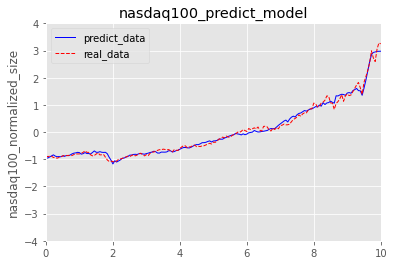

In [ ]:
with plt.style.context('ggplot'):
  plt.plot(x, predr, 'b-', linewidth=1, label='predict_data') # - solid
  plt.plot(x, 종속, 'r--', linewidth=1, label='real_data') # -- 점선

  plt.xlim(0, 10) # 최대 최소값
  plt.ylim(-4, 4);
  plt.title('nasdaq100_predict_model')
  plt.ylabel('nasdaq100_normalized_size')
  plt.legend(); # 범례 지정